In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install opendatasets

In [3]:
import opendatasets as ods
dataset_url='https://www.kaggle.com/datasets/masoudnickparvar/brain-tumor-mri-dataset'
dataset2_url='https://www.kaggle.com/datasets/mdaiyub/vgg19-weight'
dataset3_url='https://www.kaggle.com/datasets/ramizhagverdiyev/best-modelh5'

sername":"kavyasri1810","key":""}f40705a19b8fcd291389cede01903a2f

In [4]:
ods.download(dataset_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: kavyasri1810
Your Kaggle Key: ··········


100%|██████████| 149M/149M [00:01<00:00, 78.1MB/s]


In [5]:
ods.download(dataset2_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: kavyasri1810
Your Kaggle Key: ··········


100%|██████████| 71.0M/71.0M [00:01<00:00, 62.0MB/s]


In [6]:
ods.download(dataset3_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: kavyasri1810
Your Kaggle Key: ··········


100%|██████████| 96.5k/96.5k [00:00<00:00, 31.4MB/s]

In [7]:
import tensorflow as tf
import gc
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import Dropout, GlobalAveragePooling2D, Activation, BatchNormalization, Dropout, LSTM, ConvLSTM2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.applications import VGG19
from tensorflow.keras.layers import Input,Conv2D, SeparableConv2D, MaxPool2D, LeakyReLU, Activation, LSTM, ConvLSTM2D, Lambda, Reshape, BatchNormalization, Bidirectional
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint,TensorBoard,TerminateOnNaN, LearningRateScheduler, CSVLogger
from tensorflow.keras.losses import binary_crossentropy
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau, TerminateOnNaN
from tensorflow.keras.layers import Lambda, Reshape, DepthwiseConv2D, ZeroPadding2D, Add, MaxPooling2D,Activation, Flatten, Conv2D, Dense, Input, Dropout, Concatenate, GlobalMaxPooling2D, GlobalAveragePooling2D, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers
from tensorflow.keras.regularizers import l2
from tensorflow.keras import layers
from tensorflow.keras import backend as K
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split, StratifiedKFold, RepeatedStratifiedKFold
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_auc_score, roc_curve, auc
import matplotlib.pyplot as plt
from tensorflow.keras.utils import plot_model
from tensorflow.keras.layers.experimental import preprocessing
from keras.applications import imagenet_utils
from tensorflow.keras import layers
!pip install tensorflow-addons
import tensorflow_addons as tfa
import pandas as pd
import numpy as np
import random
import keras
import shutil
import pathlib
import itertools
import cv2
import os
import matplotlib.image as mpimg
import seaborn as sns


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 611.8/611.8 kB 7.3 MB/s eta 0:00:00


/usr/local/lib/python3.10/dist-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


In [8]:
train_dir = '/content/brain-tumor-mri-dataset/Training'
test_dir = '/content/brain-tumor-mri-dataset/Testing'

In [9]:
for dirpath, dirnames, filenames in os.walk(train_dir):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")


There are 4 directories and 0 images in '/content/brain-tumor-mri-dataset/Training'.
There are 0 directories and 1457 images in '/content/brain-tumor-mri-dataset/Training/pituitary'.
There are 0 directories and 1339 images in '/content/brain-tumor-mri-dataset/Training/meningioma'.
There are 0 directories and 1595 images in '/content/brain-tumor-mri-dataset/Training/notumor'.
There are 0 directories and 1321 images in '/content/brain-tumor-mri-dataset/Training/glioma'.


In [10]:
for dirpath, dirnames, filenames in os.walk(test_dir):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 4 directories and 0 images in '/content/brain-tumor-mri-dataset/Testing'.
There are 0 directories and 300 images in '/content/brain-tumor-mri-dataset/Testing/pituitary'.
There are 0 directories and 306 images in '/content/brain-tumor-mri-dataset/Testing/meningioma'.
There are 0 directories and 405 images in '/content/brain-tumor-mri-dataset/Testing/notumor'.
There are 0 directories and 300 images in '/content/brain-tumor-mri-dataset/Testing/glioma'.


Image shape: (512, 512)
Image shape: (512, 512, 3)
Image shape: (512, 512)


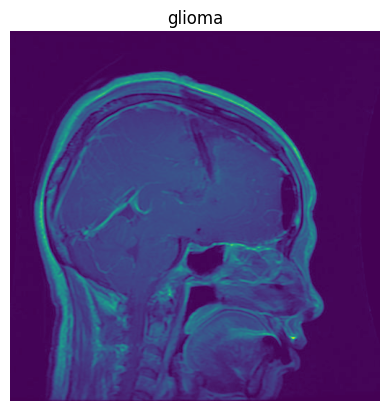

In [11]:
import os
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def view_random_image(target_dir, target_class):
    # Construct the path to the target folder
    target_folder = os.path.join(target_dir, target_class)

    # Check if the target folder exists
    if not os.path.exists(target_folder):
        print(f"Error: Folder '{target_folder}' does not exist.")
        return None

    # List all files in the target folder
    files = os.listdir(target_folder)

    # Check if there are any files in the folder
    if not files:
        print(f"Error: Folder '{target_folder}' is empty.")
        return None

    # Select a random image from the folder
    random_image_name = random.choice(files)

    # Construct the path to the random image
    random_image_path = os.path.join(target_folder, random_image_name)

    # Load and display the image
    img = mpimg.imread(random_image_path)
    plt.imshow(img)
    plt.title(target_class)
    plt.axis("off")
    print(f"Image shape: {img.shape}")

    return img

# Example usage:
test_dir = "/content/brain-tumor-mri-dataset/Testing"
target_class = "glioma"

img = view_random_image(target_dir=test_dir, target_class=target_class)
import os
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def view_random_image(target_dir, target_class):
    # Construct the path to the target folder
    target_folder = os.path.join(target_dir, target_class)

    # Check if the target folder exists
    if not os.path.exists(target_folder):
        print(f"Error: Folder '{target_folder}' does not exist.")
        return None

    # List all files in the target folder
    files = os.listdir(target_folder)

    # Check if there are any files in the folder
    if not files:
        print(f"Error: Folder '{target_folder}' is empty.")
        return None

    # Select a random image from the folder
    random_image_name = random.choice(files)

    # Construct the path to the random image
    random_image_path = os.path.join(target_folder, random_image_name)

    # Load and display the image
    img = mpimg.imread(random_image_path)
    plt.imshow(img)
    plt.title(target_class)
    plt.axis("off")
    print(f"Image shape: {img.shape}")

    return img

# Example usage:
test_dir = "/content/brain-tumor-mri-dataset/Testing"
target_class = "glioma"

img = view_random_image(target_dir=test_dir, target_class=target_class)
import os
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def view_random_image(target_dir, target_class):
    # Construct the path to the target folder
    target_folder = os.path.join(target_dir, target_class)

    # Check if the target folder exists
    if not os.path.exists(target_folder):
        print(f"Error: Folder '{target_folder}' does not exist.")
        return None

    # List all files in the target folder
    files = os.listdir(target_folder)

    # Check if there are any files in the folder
    if not files:
        print(f"Error: Folder '{target_folder}' is empty.")
        return None

    # Select a random image from the folder
    random_image_name = random.choice(files)

    # Construct the path to the random image
    random_image_path = os.path.join(target_folder, random_image_name)

    # Load and display the image
    img = mpimg.imread(random_image_path)
    plt.imshow(img)
    plt.title(target_class)
    plt.axis("off")
    print(f"Image shape: {img.shape}")

    return img

# Example usage:
test_dir = "/content/brain-tumor-mri-dataset/Testing"
target_class = "glioma"

img = view_random_image(target_dir=test_dir, target_class=target_class)


In [12]:
def view_random_image(target_dir, target_class):
  target_folder = target_dir+target_class
  random_image = random.sample(os.listdir(target_folder), 1)
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");
  print(f"Image shape: {img.shape}")
  return img

In [13]:
#img = view_random_image(target_dir=test_dir,target_class="glioma")

In [14]:
EPOCHS = 10
from math import floor
N_FOLDS = 5
INIT_LR = 1e-3
T_BS = 16
V_BS = 16
decay_rate = 0.95
decay_step = 1
IMAGE_SIZE = [224,224]

In [15]:
!pip install tensorflow-addons
import tensorflow_addons as tfa

def augment_image(image, label):
    # Apply augmentation transformations
    image = tf.image.random_flip_left_right(image)
    image = tf.image.random_flip_up_down(image)
    image = tf.image.random_brightness(image, max_delta=0.1)
    image = tf.image.random_contrast(image, lower=0.8, upper=1.2)
    image = tf.image.random_saturation(image, lower=0.8, upper=1.2)
    image = tf.image.random_hue(image, max_delta=0.1)

    # Apply the width and height shifts
    width_shift = tf.random.uniform([], -0.2, 0.2) * tf.cast(tf.shape(image)[1], tf.float32)
    height_shift = tf.random.uniform([], -0.2, 0.2) * tf.cast(tf.shape(image)[0], tf.float32)
    image = tfa.image.translate(image, [width_shift, height_shift])

    return image, label

In [16]:
train_data = tf.keras.preprocessing.image_dataset_from_directory(train_dir,
                                                                 label_mode="categorical",
                                                                 batch_size=32,
                                                                 image_size=IMAGE_SIZE)

test_data = tf.keras.preprocessing.image_dataset_from_directory(test_dir,
                                                                label_mode="categorical",
                                                                image_size=IMAGE_SIZE,
                                                                shuffle=False)

Found 5712 files belonging to 4 classes.
Found 1311 files belonging to 4 classes.


In [17]:

train_dataset_augmented = train_data.map(augment_image)


In [18]:
def Combined_model():
    # Input layer
    input_layer = Input(shape=(224, 224, 3))

    # Base VGG19 model as a feature extractor
    baseModel = VGG19(weights=None, include_top=False, input_tensor=input_layer)

    # Load the weights from the local file (specify the path)
    baseModel.load_weights('/content/vgg19-weight/vgg19_weights_tf_dim_ordering_tf_kernels_notop.h5')

    # Freeze the layers of the VGG19 model
    for layer in baseModel.layers:
        layer.trainable = False

    x = baseModel.output

    # LSTM layer
    x = Reshape((49, 512))(x)
    x = LSTM(512, activation="elu", return_sequences=True, trainable=False)(x)
    x = BatchNormalization()(x)

    # FC layer
    x = Flatten(name="flatten")(x)

    # fc1 layer
    x = Dense(units=4096, activation='elu')(x)
    x = BatchNormalization()(x)

    # fc2 layer
    x = Dense(units=4096, activation='elu')(x)
    x = BatchNormalization()(x)

    # Output layer
    output = Dense(units=4, activation='softmax')(x)

    model = Model(inputs=input_layer, outputs=output)
    opt = Adam(lr=1e3)
    model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=["accuracy"])

    return model

# Create the model
model = Combined_model()

# Print the model summary
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [19]:
checkpoint = [ModelCheckpoint(filepath='/content/best-modelh5/best_model.h5', monitor='val_accuracy',mode='max',verbose=1,save_best_only=True,save_weights_only=True),
             LearningRateScheduler(lambda epoch : INIT_LR * pow(decay_rate, floor(epoch / decay_step)))]
earlystop = EarlyStopping(monitor='accuracy', min_delta=0, patience=15, verbose=1, mode='max')

In [ ]:
history = model.fit(train_dataset_augmented,
                    epochs=10,
                    steps_per_epoch=len(train_dataset_augmented),
                    validation_data = test_data,
                    callbacks=[checkpoint])

Epoch 1/10
179/179 [==============================] - ETA: 0s - loss: 1.3812 - accuracy: 0.7666
Epoch 1: val_accuracy improved from -inf to 0.81388, saving model to /content/best-modelh5/best_model.h5
179/179 [==============================] - 90s 422ms/step - loss: 1.3812 - accuracy: 0.7666 - val_loss: 0.7304 - val_accuracy: 0.8139 - lr: 0.0010
Epoch 2/10
179/179 [==============================] - ETA: 0s - loss: 0.4222 - accuracy: 0.8473
Epoch 2: val_accuracy improved from 0.81388 to 0.83524, saving model to /content/best-modelh5/best_model.h5
179/179 [==============================] - 57s 316ms/step - loss: 0.4222 - accuracy: 0.8473 - val_loss: 0.6099 - val_accuracy: 0.8352 - lr: 9.5000e-04
Epoch 3/10
179/179 [==============================] - ETA: 0s - loss: 0.3675 - accuracy: 0.8745
Epoch 3: val_accuracy improved from 0.83524 to 0.88787, saving model to /content/best-modelh5/best_model.h5
179/179 [==============================] - 60s 331ms/step - loss: 0.3675 - accuracy: 0.8745 -

In [ ]:
model.load_weights('/content/best-modelh5/best_model.h5')
_, accuracy = model.evaluate(test_data)
print(f"Validation accuracy: {round(accuracy * 100, 2)}%")

In [ ]:
pred_probs = model.predict(test_data, verbose=1)

In [ ]:
pred_classes = pred_probs.argmax(axis=1)

y_labels = []
for images, labels in test_data.unbatch():
  y_labels.append(labels.numpy().argmax())

In [ ]:
target_names = ['Glioma', 'Meningioma', 'No Tumor','Pituitary']
print(classification_report(y_labels,
                            pred_classes,
                            target_names=target_names, digits=4))

In [ ]:
cm = confusion_matrix(y_labels,pred_classes)

TP = cm[0, 0]
TN = cm[1:, 1:].sum()
FP = cm[0, 1:].sum()
FN = cm[1:, 0].sum()

Population = TN+FN+TP+FP
spesificity = TN / (TN + FP)
sensitivity = TP / (TP + FN)

print("True Positives:", TP)
print("False Positives:", FP)
print("True Negatives:", TN)
print("False Negatives:", FN)
print("Specificity:", spesificity)
print("Sensitivity:", sensitivity)

In [ ]:
def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(20, 20), text_size=15, norm=False, savefig=False):

  cm = confusion_matrix(y_true, y_pred)
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis]
  n_classes = cm.shape[0]

  fig, ax = plt.subplots(figsize=figsize)
  cax = ax.matshow(cm, cmap=plt.cm.Blues)
  fig.colorbar(cax)

  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])

  ax.grid(False)

  ax.set(title="Confusion Matrix",
         xlabel="Predicted label",
         ylabel="True label",
         xticks=np.arange(n_classes),
         yticks=np.arange(n_classes),
         xticklabels=labels,
         yticklabels=labels)

  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  plt.xticks(rotation=70, fontsize=text_size)
  plt.yticks(fontsize=text_size)

  threshold = (cm.max() + cm.min()) / 2.

  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    if norm:
      plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
              horizontalalignment="center",
              color="white" if cm[i, j] > threshold else "black",
              size=text_size)
    else:
      plt.text(j, i, f"{cm[i, j]}",
              horizontalalignment="center",
              color="white" if cm[i, j] > threshold else "black",
              size=text_size)

In [ ]:
make_confusion_matrix(y_true=y_labels,
                      y_pred=pred_classes,
                      classes=target_names,
                      figsize=(5, 5),
                      text_size=12,
                      norm=False,
                      savefig=True)

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)

plt.figure(figsize=(5.5, 4))

plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation Loss', fontsize=12)
plt.xlabel('Epochs', fontsize=10)
plt.ylabel('Loss', fontsize=10)
plt.legend(fontsize=10)

plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.grid(False)

plt.tight_layout()
plt.show()


In [ ]:
loss = history.history['accuracy']
val_loss = history.history['val_accuracy']
epochs = range(1, len(loss) + 1)

plt.figure(figsize=(5.5, 4))

plt.plot(epochs, loss, 'y', label='Training acc')
plt.plot(epochs, val_loss, 'r', label='Validation acc')
plt.title('Training and Validation Loss', fontsize=12)
plt.xlabel('Epochs', fontsize=10)
plt.ylabel('Loss', fontsize=10)
plt.legend(fontsize=10)

plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.grid(False)

plt.tight_layout()
plt.show()
